# Final Processing
The final processing stage requires:
1. Quick validation of catalogues and Bayesian Pvalue maps
2. Skewness level
3. Adding flag to catalogue

In [1]:
import seaborn as sns
from astropy.table import Table
%matplotlib inline
import numpy as np
import pylab as plt

## Read tables

In [2]:
SWIRE_cat=Table.read('./data/dmu26_XID+PACS_ELAIS-N2_SWIRE_cat.fits')

In [12]:
SWIRE_cat[0:10]

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J161008.641+533615.951,242.536005913,53.6044309555,7.01074,14.0252,2.18478,10.9219,21.7225,3.56813,0.00057904,0.000651642,1.45101e-05,2.32569e-05,0.999096,0.998866,2000.0,2000.0,0.0,0.0
HELP_J161002.817+533625.213,242.511735883,53.6070036615,6.1809,13.8533,2.00791,4.25353,10.4538,1.05381,0.00057904,0.000651642,1.45101e-05,2.32569e-05,1.00092,0.998338,2000.0,2000.0,0.0,0.0
HELP_J161009.708+533610.215,242.540451147,53.6028373869,5.76325,12.2582,1.856,12.509,24.4277,4.29031,0.00057904,0.000651642,1.45101e-05,2.32569e-05,0.998442,1.00071,2000.0,2000.0,0.0,0.0
HELP_J161000.625+533444.663,242.50260411,53.5790731835,5.39088,11.4476,1.68745,18.3196,30.9601,7.32784,0.00057904,0.000651642,1.45101e-05,2.32569e-05,0.999324,1.00043,2000.0,2000.0,0.0,0.0
HELP_J161001.356+533536.905,242.50564932,53.5935847165,11.8158,20.7236,4.38242,6.00817,13.6223,1.7725,0.00057904,0.000651642,1.45101e-05,2.32569e-05,1.00104,0.998621,2000.0,2000.0,0.0,0.0
HELP_J161004.821+533526.090,242.520085665,53.5905806855,4.17299,9.42867,1.18958,19.2817,31.2408,8.18757,0.00057904,0.000651642,1.45101e-05,2.32569e-05,0.999042,1.00123,2000.0,2000.0,0.0,0.0
HELP_J161009.666+533550.864,242.540275318,53.5974621925,6.95301,14.0691,2.27669,11.5124,22.4518,3.62555,0.00057904,0.000651642,1.45101e-05,2.32569e-05,1.0004,1.00156,2000.0,2000.0,0.0,0.0
HELP_J161004.741+533640.873,242.519754128,53.6113536495,5.14638,11.6493,1.41308,5.0702,12.3191,1.3775,0.00057904,0.000651642,1.45101e-05,2.32569e-05,0.998579,0.998787,2000.0,2000.0,0.0,0.0


In [14]:
SWIRE_cat

help_id,RA,Dec,F_PACS_100,FErr_PACS_100_u,FErr_PACS_100_l,F_PACS_160,FErr_PACS_160_u,FErr_PACS_160_l,Bkg_PACS_100,Bkg_PACS_160,Sig_conf_PACS_100,Sig_conf_PACS_160,Rhat_PACS_100,Rhat_PACS_160,n_eff_PACS_100,n_eff_PACS_160,Pval_res_100,Pval_res_160
,degrees,degrees,mJy,mJy,mJy,mJy,mJy,mJy,mJy/Beam,mJy/Beam,mJy/Beam,mJy/Beam,,,,,,
str27,float64,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
HELP_J161008.641+533615.951,242.536005913,53.6044309555,7.01074,14.0252,2.18478,10.9219,21.7225,3.56813,0.00057904,0.000651642,1.45101e-05,2.32569e-05,0.999096,0.998866,2000.0,2000.0,0.0,0.0
HELP_J161002.817+533625.213,242.511735883,53.6070036615,6.1809,13.8533,2.00791,4.25353,10.4538,1.05381,0.00057904,0.000651642,1.45101e-05,2.32569e-05,1.00092,0.998338,2000.0,2000.0,0.0,0.0
HELP_J161009.708+533610.215,242.540451147,53.6028373869,5.76325,12.2582,1.856,12.509,24.4277,4.29031,0.00057904,0.000651642,1.45101e-05,2.32569e-05,0.998442,1.00071,2000.0,2000.0,0.0,0.0
HELP_J161000.625+533444.663,242.50260411,53.5790731835,5.39088,11.4476,1.68745,18.3196,30.9601,7.32784,0.00057904,0.000651642,1.45101e-05,2.32569e-05,0.999324,1.00043,2000.0,2000.0,0.0,0.0
HELP_J161001.356+533536.905,242.50564932,53.5935847165,11.8158,20.7236,4.38242,6.00817,13.6223,1.7725,0.00057904,0.000651642,1.45101e-05,2.32569e-05,1.00104,0.998621,2000.0,2000.0,0.0,0.0
HELP_J161004.821+533526.090,242.520085665,53.5905806855,4.17299,9.42867,1.18958,19.2817,31.2408,8.18757,0.00057904,0.000651642,1.45101e-05,2.32569e-05,0.999042,1.00123,2000.0,2000.0,0.0,0.0
HELP_J161009.666+533550.864,242.540275318,53.5974621925,6.95301,14.0691,2.27669,11.5124,22.4518,3.62555,0.00057904,0.000651642,1.45101e-05,2.32569e-05,1.0004,1.00156,2000.0,2000.0,0.0,0.0
HELP_J161004.741+533640.873,242.519754128,53.6113536495,5.14638,11.6493,1.41308,5.0702,12.3191,1.3775,0.00057904,0.000651642,1.45101e-05,2.32569e-05,0.998579,0.998787,2000.0,2000.0,0.0,0.0


## Look at Symmetry of PDFs to determine depth level of catalogue

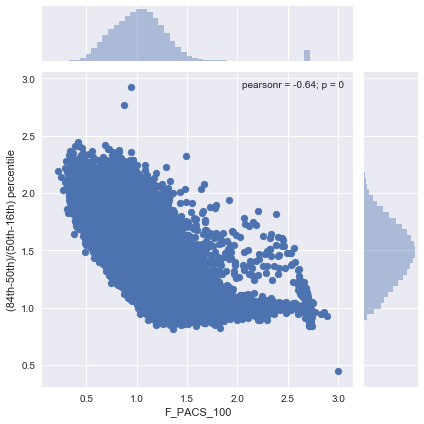

In [3]:
skew=(SWIRE_cat['FErr_PACS_100_u']-SWIRE_cat['F_PACS_100'])/(SWIRE_cat['F_PACS_100']-SWIRE_cat['FErr_PACS_100_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_PACS_100']),y=skew, kind='scatter')

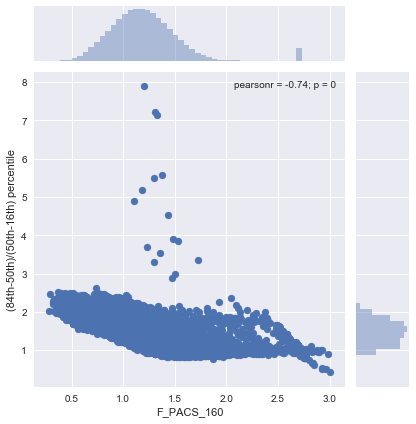

In [4]:
skew=(SWIRE_cat['FErr_PACS_160_u']-SWIRE_cat['F_PACS_160'])/(SWIRE_cat['F_PACS_160']-SWIRE_cat['FErr_PACS_160_l'])
skew.name='(84th-50th)/(50th-16th) percentile'
g=sns.jointplot(x=np.log10(SWIRE_cat['F_PACS_160']),y=skew, kind='scatter')

## Add flag to catalogue

In [5]:
from astropy.table import Column
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_PACS_100'))
SWIRE_cat.add_column(Column(np.zeros(len(SWIRE_cat), dtype=bool),name='flag_PACS_160'))


In [12]:
ind_SWIRE_100=(SWIRE_cat['Pval_res_100']>0.5) | (SWIRE_cat['F_PACS_100'] < 12.5) | ((SWIRE_cat['FErr_PACS_100_u']-SWIRE_cat['F_PACS_100'])>150)
ind_SWIRE_160=(SWIRE_cat['Pval_res_160']>0.5) | (SWIRE_cat['F_PACS_160'] < 17.5) | ((SWIRE_cat['FErr_PACS_160_u']-SWIRE_cat['F_PACS_160'])>150)


In [13]:
print(ind_SWIRE_100.sum(),ind_SWIRE_160.sum(),len(SWIRE_cat))

170332 164976 269561


In [14]:
SWIRE_cat['flag_PACS_100'][ind_SWIRE_100]=True
SWIRE_cat['flag_PACS_160'][ind_SWIRE_160]=True

In [15]:
SWIRE_cat.write('../data/ELAIS_N1/PACS/dmu26_XID+PACS_ELAIS-N1_SWIRE_cat_20170808.fits', format='fits',overwrite=True)
